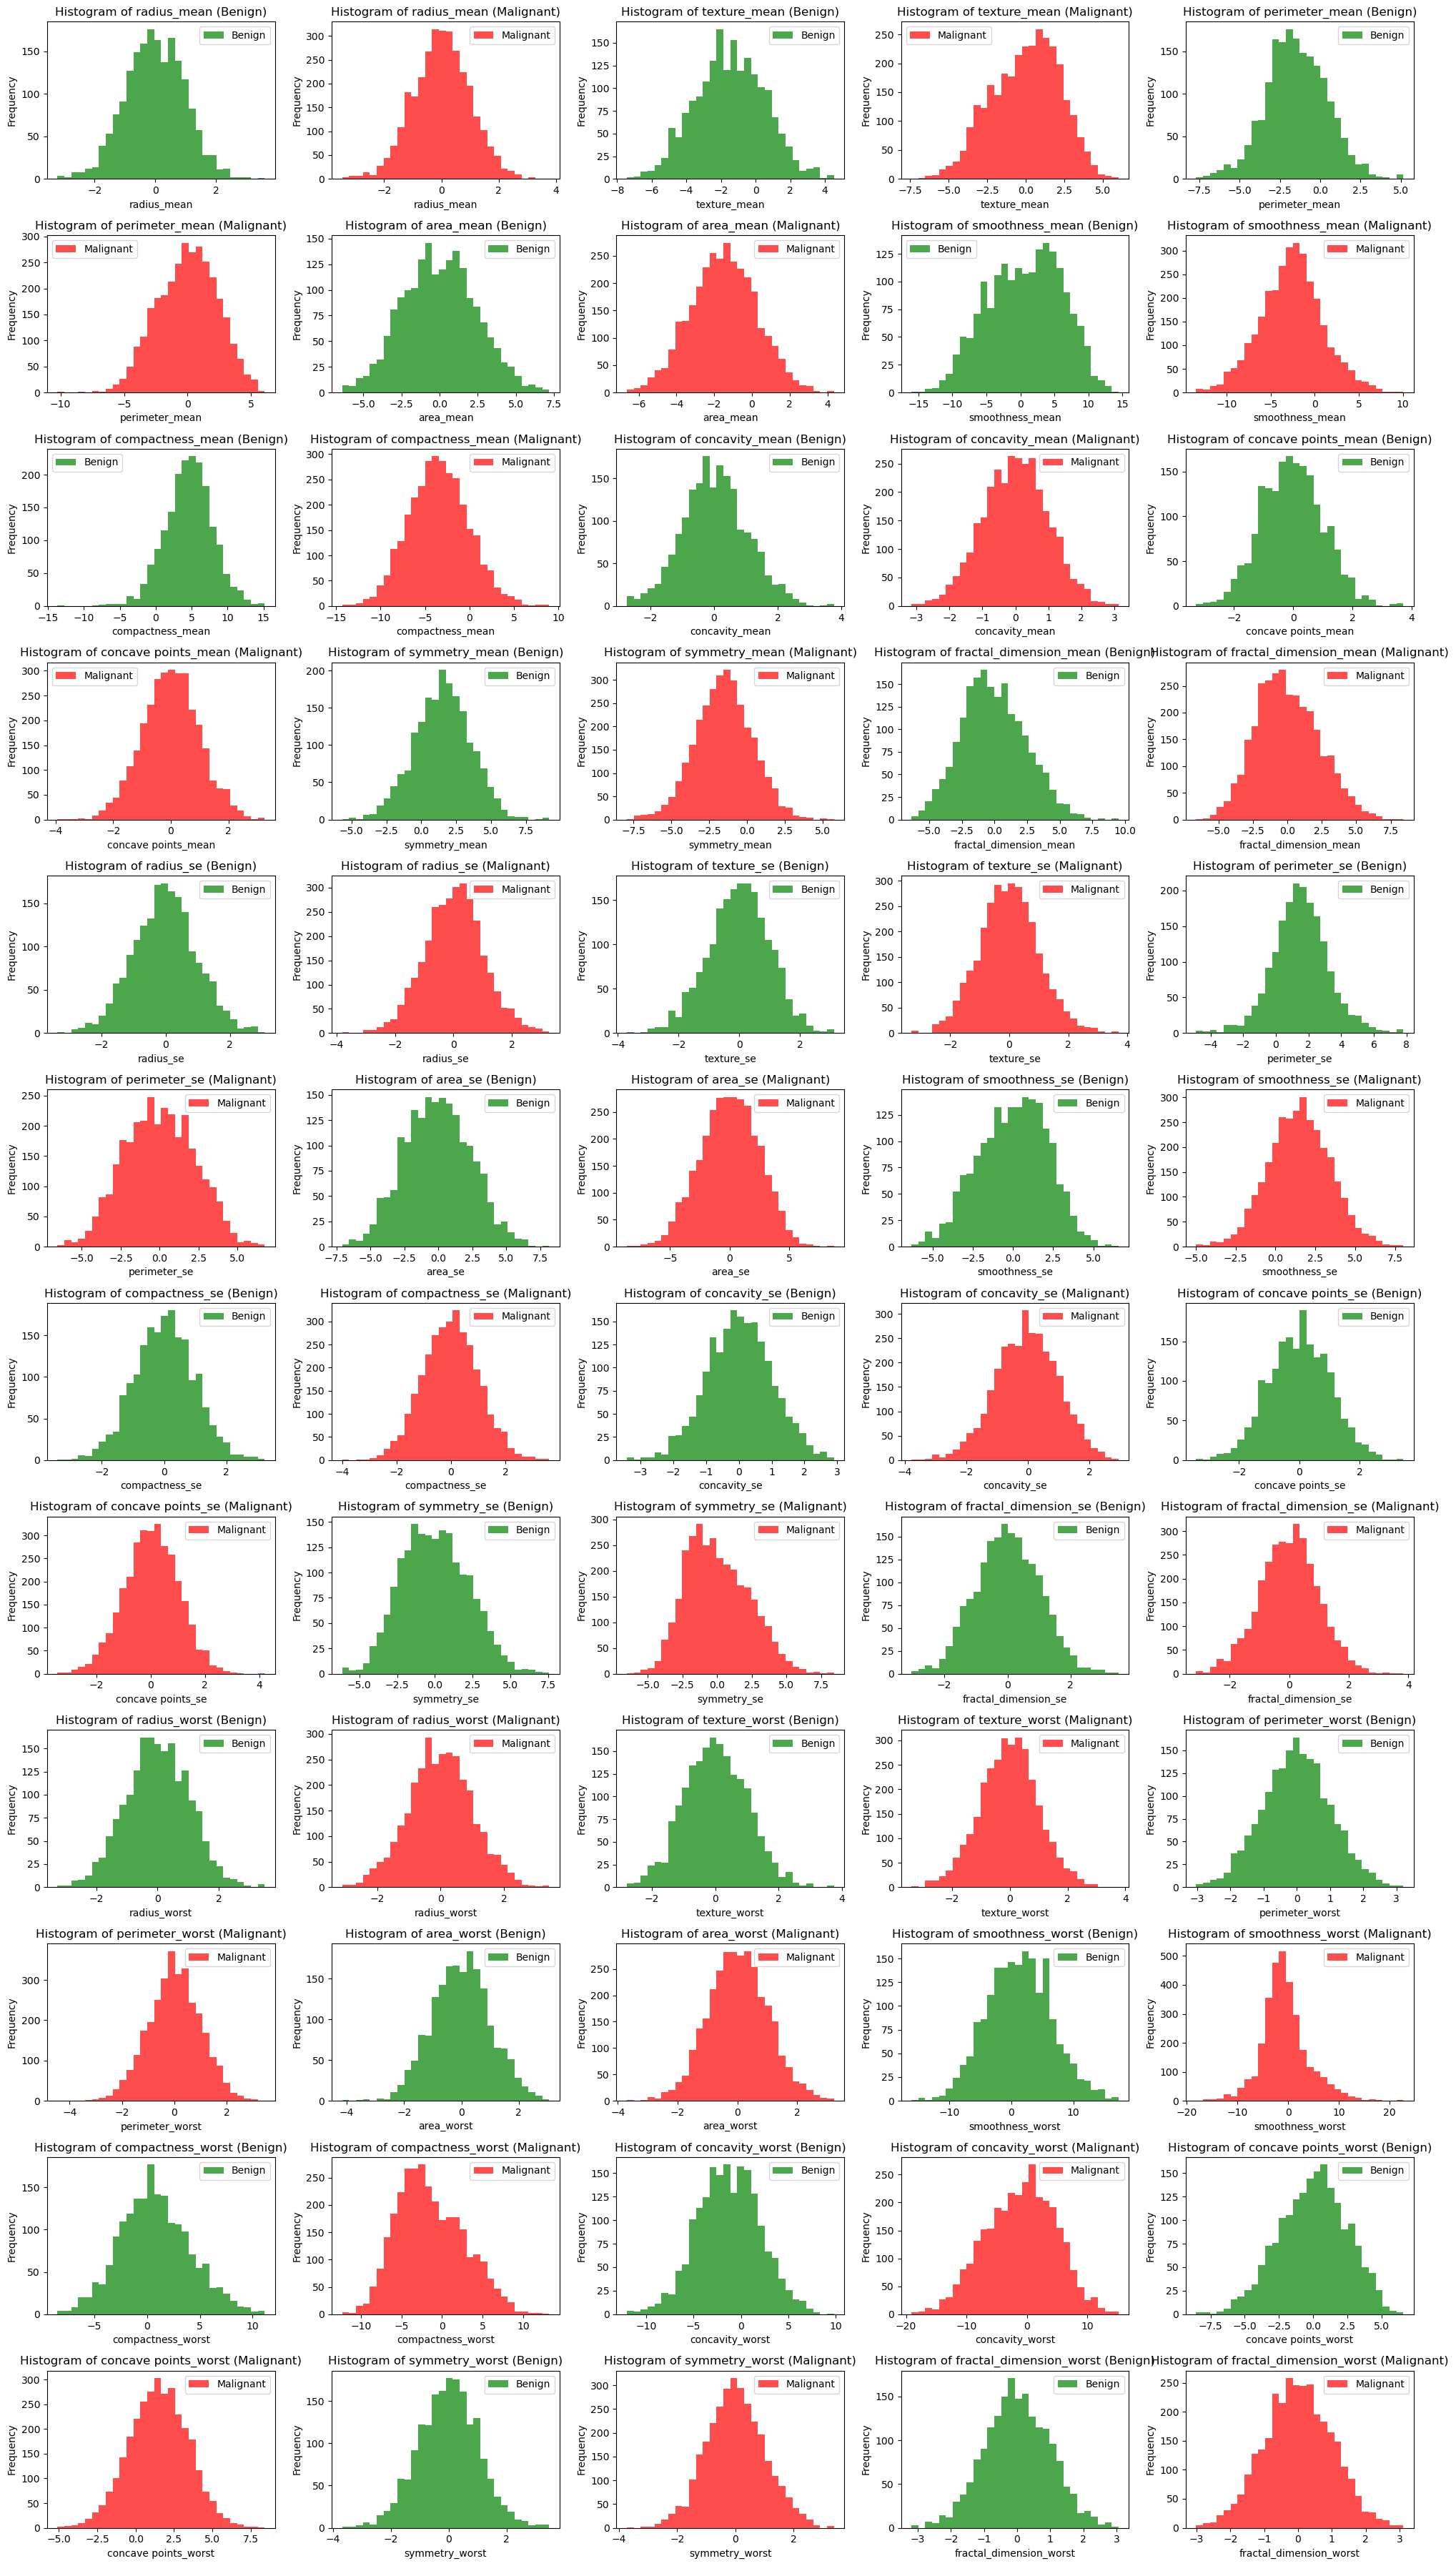

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer

# Load the breast cancer dataset
#Importation and Loading of Datasets
df = pd.read_csv('breast_cancer_updated.csv', index_col=0)
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with 'diagnosis' and feature columns
# Replace this with your data loading logic (e.g., df = pd.read_csv('your_file.csv'))

# List of features to plot (adjust based on your dataset columns)
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with 'diagnosis' and feature columns
# Replace this with your data loading logic (e.g., df = pd.read_csv('your_file.csv'))

# List of features to plot (adjust based on your dataset columns)
dropdiagnosis =  df.drop(columns=['diagnosis'])
features = dropdiagnosis.columns.tolist()

# Number of features and set up the grid
n_features = len(features)
n_cols = 5  # Five columns (each pair of benign and malignant histograms takes 2 columns, but we adjust for 5 total)
n_subplots = 2 * n_features  # Total number of histograms (benign + malignant for each feature)
n_rows = (n_subplots + n_cols - 1) // n_cols  # Calculate number of rows to fit all subplots

# Create a figure with subplots
plt.figure(figsize=(20, 3 * n_rows))  # Increased width to accommodate 5 columns

# Loop through each feature
for i, feature in enumerate(features, 1):
    # Extract data for benign and malignant
    benign_data = df[df['diagnosis'] == 'B'][feature]
    malignant_data = df[df['diagnosis'] == 'M'][feature]

    # Plot benign histogram
    plt.subplot(n_rows, n_cols, 2 * i - 1)  # Position for benign (odd indices)
    plt.hist(benign_data, bins=30, color='green', alpha=0.7, label='Benign')
    plt.title(f'Histogram of {feature} (Benign)')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.legend()

    # Plot malignant histogram
    plt.subplot(n_rows, n_cols, 2 * i)  # Position for malignant (even indices)
    plt.hist(malignant_data, bins=30, color='red', alpha=0.7, label='Malignant')
    plt.title(f'Histogram of {feature} (Malignant)')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.legend()

# Adjust layout and display
plt.tight_layout()
plt.show()